[![Colab Badge](https://img.shields.io/badge/Open_in_Colab-blue?style=for-the-badge)][colab-link]
<a href="javascript:void(0);" onclick="openJupyterWidget('https://github.com/nmfs-opensci/nmfshackdays-2025/blob/main/topics-2025/2025-02-14-earthdata/5-virtual-dataset.ipynb');">
    <img src="https://img.shields.io/badge/Open_in_JupyterHub-orange?style=for-the-badge" alt="JupyterHub Badge">
</a> [![Download Badge](https://img.shields.io/badge/Download-grey?style=for-the-badge)][download-link]

[download-link]: https://nmfs-opensci.github.io/NMFSHackDays-2025/topics-2025/2025-02-14-earthdata/5-virtual-dataset.ipynb
[colab-link]: https://colab.research.google.com/github/nmfs-opensci/nmfshackdays-2025/blob/main/topics-2025/2025-02-14-earthdata/5-virtual-dataset.ipynb
[jupyter-link]: https://nmfs-openscapes.2i2c.cloud/hub/user-redirect/lab?fromURL=https://raw.githubusercontent.com/nmfs-opensci/nmfshackdays-2025/main/topics-2025/2025-02-14-earthdata/5-virtual-dataset.ipynb

>📘 Learning Objectives
> 1. Create a big data cube faster without creating a file set

## Overview

If we have many many files (granules), then running `earthaccess.open(results)` is going to be very slow. Let's use `earthaccess.open_virtual_mfdataset()` instead to create our metadata for `xarray`.

In [1]:
import earthaccess
import xarray

In [2]:
results = earthaccess.search_data(count=100, short_name="MUR-JPL-L4-GLOB-v4.1")
len(results)

100

Create a virtual representation of the data.

In [3]:
%%time
ds = earthaccess.open_virtual_mfdataset(
    results,
    access="direct",
    load=True,
    concat_dim="time",
    coords="all",
    compat="override",
    combine_attrs="drop_conflicts",
)
ds

CPU times: user 7.24 s, sys: 502 ms, total: 7.74 s
Wall time: 13.4 s


<xarray.Dataset> Size: 2TB
Dimensions:           (time: 100, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time              (time) datetime64[ns] 800B 2002-06-01T09:00:00 ... 2002...
Data variables:
    analysed_sst      (time, lat, lon) float64 518GB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 518GB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    mask              (time, lat, lon) float32 259GB dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 518GB dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
Attributes: (12/41)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [6]:
print(f"{mur.nbytes / 1e12} Tb")

1.814299416796 Tb


In [10]:
ds

<xarray.Dataset> Size: 2TB
Dimensions:           (time: 100, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time              (time) datetime64[ns] 800B 2002-06-01T09:00:00 ... 2002...
Data variables:
    analysed_sst      (time, lat, lon) float64 518GB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 518GB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    mask              (time, lat, lon) float32 259GB dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 518GB dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
Attributes: (12/41)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In the future, we should be able to do something like this if a DAAC pre-creates the metadata for us.

In [12]:
ds_sub = ds["analysed_sst"].sel(lon=slice(-25,-23), lat=slice(-25,-23))

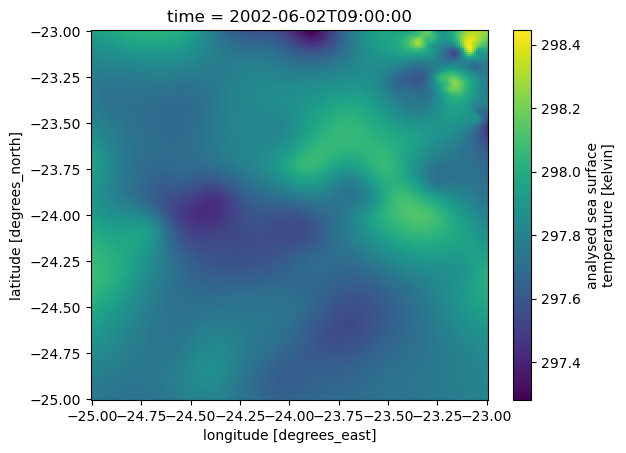

In [13]:
ds_sub.isel(time=1).plot()

Create daily means.

In [14]:
ds_mean = ds_sub.sel(time="2002").mean(dim=['lat', 'lon'])

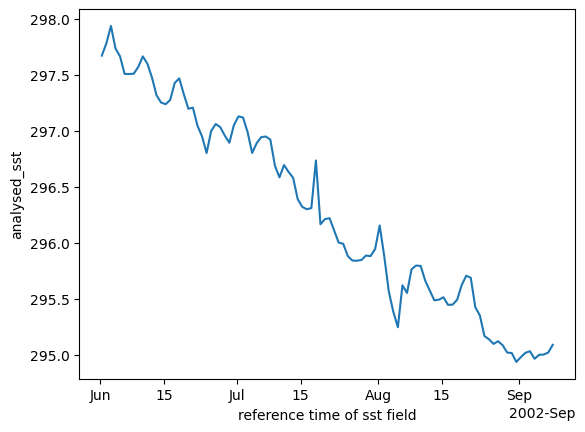

In [17]:
ds_mean.plot();

## Summary

We learned how to use `open_virtual_dataset` with `earthaccess` to make a data cube faster than with `earthaccess.open()`.